In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

In [3]:
path = os.path.abspath("")
obj = 'lamp'
filePath = f'{path}\\..\\{obj}\\{obj}'
inter = cv2.imread(f'{filePath}.jpg')
img = cv2.cvtColor(inter, cv2.COLOR_RGB2BGR)

In [4]:
def denoise(image, h = 20, templateWindowSize = 7, serachWindowSize = 21):
    return cv2.fastNlMeansDenoising(image, None, h, templateWindowSize, serachWindowSize)

In [5]:
def sharpen(image, sigmaX = 1, alpha = 2, beta = -15):
    sharpened_image = cv2.addWeighted(image, 1.5, cv2.GaussianBlur(image, (0, 0), sigmaX), -1, 0)
    return cv2.convertScaleAbs(sharpened_image, alpha = alpha, beta = beta)

In [6]:
def plot_images():
    noised = img
    denoised = denoise(noised)
    sharpened = sharpen(denoised)

    rmse1 = np.sqrt(np.mean((noised - denoised) ** 2))
    rmse2 = np.sqrt(np.mean((noised - sharpened) ** 2))

    images = [
        noised, denoised, cv2.absdiff(noised, denoised),
        noised, sharpened, cv2.absdiff(noised, sharpened)
    ]
    image_titles = [
        'Noised RGB image',
        'Denoised RGB image',
        f'Difference between noised and denoised RGB images\n RMSE: {rmse1:.3f}',
        'Noised RGB image',
        'Sharpened RGB image',
        f'Difference between noised and sharpened RGB images\n RMSE: {rmse2:.3f}'
    ]

    num_rows = 2
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()

    for i, (image, title) in enumerate(zip(images, image_titles)):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(title, fontsize=12)  # Set the title
        axes[i].axis('off')  # Hide axes ticks and labels

    # If there are empty subplots, turn off the axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{filePath}-comparison-plot.png', format='png', dpi=600)
    plt.show()

In [12]:
def plot_performance():
    times = []

    for x in range(100):

        start = time.time()

        denoised_image = denoise(img)
        sharpened_image = sharpen(denoised_image)

        times.append(time.time() - start)

    mean = np.mean(times)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(range(100), times, marker='o', label = "Iterations execution time")
    plt.plot(range(100), [mean for x in range(100)], marker='o', label = "Mean execution time")
    plt.title('Lamp Denoising Execution Time')
    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{filePath}-performance-plot.png', format='png', dpi=600)
    plt.show()

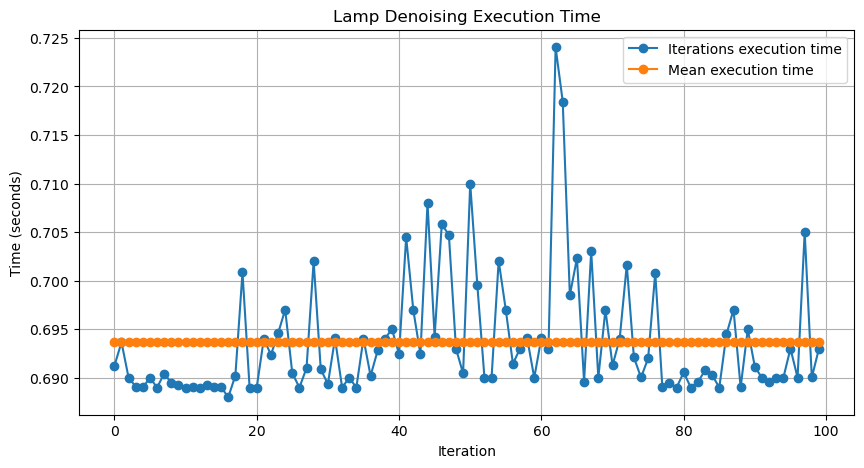

In [13]:
plot_performance()

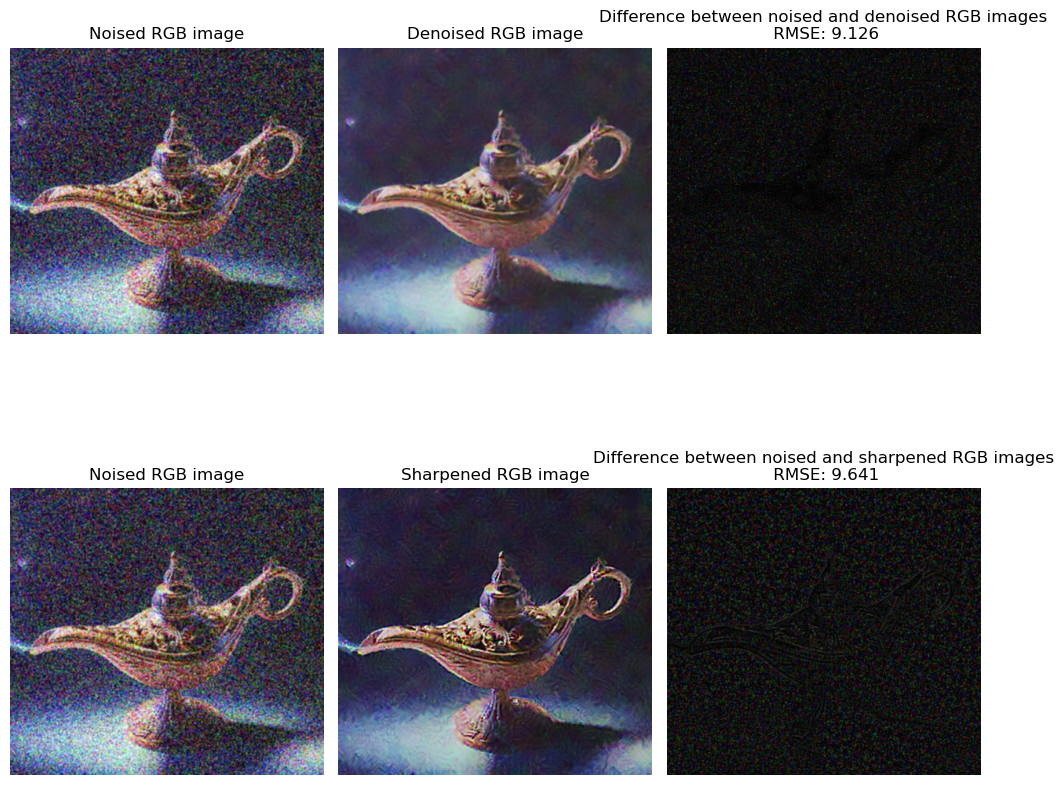

In [9]:
plot_images()